# 第2章 感知机

二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

---
## 算法

随机梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

η是步长/学习率（0<η ≤1）
当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该误分类点的一侧移动，直至误分类点被正确分类

拿出iris(鸢尾花)数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris#使用load_iris模块，里面有150组鸢尾花特征数据
import matplotlib.pyplot as plt
%matplotlib inline

## 数据集简介
#### 数据集包含150个样本（数据集的行）
##### 数据集包含4个属性（数据集的列）：Sepal Length，Sepal Width，Petal Length，Petal Width：‘feature_names’
#### 利用numpy.ndarray存储这150x4的数据：‘data’
#### 分类标签取自array[‘Setosa’，‘Versicolour’，‘Virginica’]：‘target_names’  Setosa，Versicolour，Virginica是数据集所包含的3种品种的鸢尾花，这3个分类标签（即150x1数据）用np.ndarray存储：‘target’
- 总之，这个数据存储了150x4的特征数据和150x1的分类标签，其中特征数据又放在‘data’里，分类标签放在‘target’里


In [3]:
# load data
iris = load_iris()
print('分类标签',iris.target)
print('特征数据',iris.data[:3])
print('特征属性',iris.feature_names)

分类标签 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
特征数据 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
特征属性 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
print('处理后的数据框',df[0:3])

处理后的数据框    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   label  
0      0  
1      0  
2      0  


In [4]:
#
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()
#用来统计数据表中，指定列里有多少个不同的数据值，并计算每个不同值有在该列中的个数


2    50
1    50
0    50
Name: label, dtype: int64

## plt.scatter()——散点图的绘制

matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

- x, y → 散点的坐标
- s → 散点的面积
- c → 散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）
- marker → 散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）
- alpha → 散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）
- linewidths →散点的边缘线宽
- edgecolors → 散点的边缘颜色


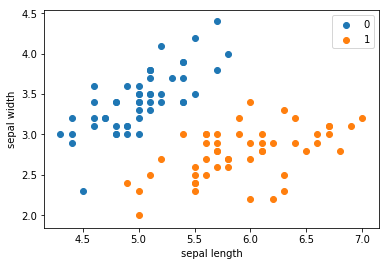

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')#坐标轴标签
plt.ylabel('sepal width')
plt.legend()#设置图例

In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]])#iloc切片函数
# data的值为df中0-100行,列数为0/1/-1的数据,
print(data[0:3])
print(data[50:53])

[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]]
[[7.  3.2 1. ]
 [6.4 3.2 1. ]
 [6.9 3.1 1. ]]


In [6]:
X, y = data[:,:-1], data[:,-1]
# 给x,y赋值x为鸢尾花的花萼长度和宽度，y为鸢尾花的种类label
print(X[0:3])
print(y[0:3])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]]
[0. 0. 0.]


In [8]:
y = np.array([1 if i == 1 else -1 for i in y])
# 根据鸢尾花的label类型，将类型非1的鸢尾花label转化为-1，种类label为1的鸢尾花label不变
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Perceptron

In [9]:
# 数据线性可分，二分类数据
# 建立感知器模型,用python类表示
class Model:
    #初始化函数
    def __init__(self):#将参数w1,w2置为1 b置为0 学习率为0.1
        self.w = np.ones(len(data[0])-1, dtype=np.float32) # 返回1*2的ones矩阵[1. 1.]作为权值w
        #np.ones()函数返回给定形状和数据类型的新数组，其中元素的值设置为1
        self.b = 0                                         # 将0赋予偏置b
        self.l_rate = 0.1                                  # 学习率(梯度下降时的步长) = 0.1
        # self.data = data
    # sign函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b  # w * x + b
        return y
    
    # 随机梯度下降法(感知器函数)
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                # 通过y*(wx+b)>0判断训练集中没有误分类点
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X) # w = w + rate * y * x
                    self.b = self.b + self.l_rate*y           # b = b + rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
        
    def score(self):
        pass

In [10]:
#训练数据，得到感知器
perceptron = Model()
perceptron.fit(X, y)
print(perceptron.w,perceptron.b)
w_ = perceptron.w
bias = perceptron.b
print('f(x) = ', w_ , '* x ',bias)   # 输出结果

[  7.8 -10. ] -12.099999999999973
f(x) =  [  7.8 -10. ] * x  -12.099999999999973


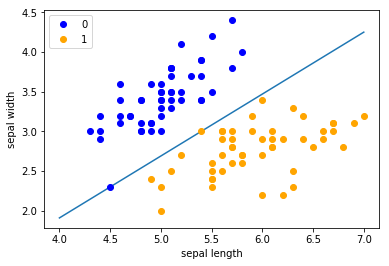

In [11]:
#结果可视化

# 绘制超平面,一元一次线性方程
x_points = np.linspace(4, 7,10)#观察数据得x分布在4-7之间，np.linspace主要用来创建等差数列
y_points = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
# y = w*x+b/||w|| 是任意一点到超平面的距离
plt.plot(x_points, y_points)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
 # 取0-49行iris.target('label') = 0的同一类鸢尾花画散点图
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
# 取50-99行iris.target('label') = 0的同一类鸢尾花画散点图
plt.xlabel('sepal length')# x为鸢尾花花萼长度
plt.ylabel('sepal width') # y为鸢尾花花萼宽度
plt.legend()

## scikit-learn Perceptron

- 参数解释：
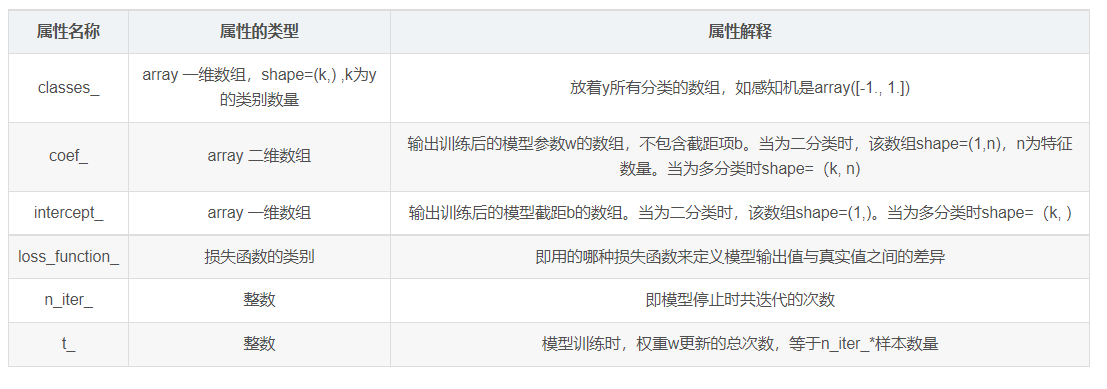
- 属性解释
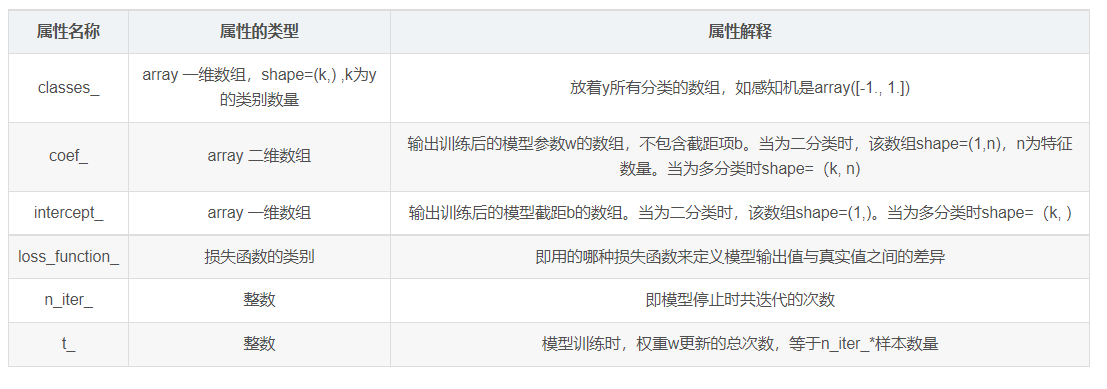

In [22]:
from sklearn.linear_model import Perceptron#导入感知机模型
#print(X,y)

In [13]:
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
clf.fit(X, y)

Perceptron()

In [14]:
# Weights assigned to the features.  权值w
print(clf.coef_)

[[ 23.2 -38.7]]


In [15]:
# 截距 Constants in decision function.  偏置b
print(clf.intercept_)

[-5.]


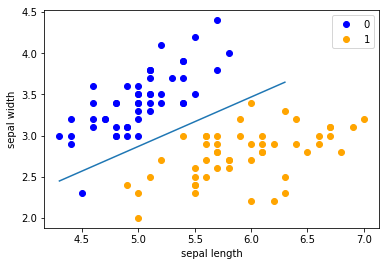

In [21]:
# 绘制sklearn结果的散点图
x_points_2 = np.arange(4.3, 7.1)# x,为4,5,6,7，默认步长为1，起始为4，终止为8，不取8
y_points_2 = -(clf.coef_[0][0]*x_points_2 + clf.intercept_)/clf.coef_[0][1]# 绘制超平面
plt.plot(x_points_2, y_points_2)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# 将数据的前50个数据绘制散点图
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
# 将数据的50-100之间的数据绘制成散点图
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()